# Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Muenster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [3]:
bbox = BboxSelector([
    7.393798828125, # min_x
    51.46812470399791, # min_y
    7.5421142578125, # max_x
    51.54548101558932  # max_y
])
#requested data for some part of Muenster

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,Speed.value,Speed.unit,GPS Accuracy.value,GPS Accuracy.unit,O2 Lambda Voltage ER.value,...,sensor.constructionYear,sensor.manufacturer,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit,Consumption.value,Consumption.unit,CO2.value,CO2.unit
0,5e3de5453965f36894baef60,2020-02-07T21:37:55,POINT (7.68222 51.54408),9.0,c,0.000000,km/h,9.648001,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e3de5453965f36894baef62,2020-02-07T21:38:00,POINT (7.68222 51.54408),9.0,c,2.455542,km/h,10.171660,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e3de5453965f36894baef63,2020-02-07T21:38:05,POINT (7.68228 51.54398),9.0,c,18.432762,km/h,9.648001,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e3de5453965f36894baef64,2020-02-07T21:38:10,POINT (7.68192 51.54384),9.0,c,34.939904,km/h,12.864000,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e3de5453965f36894baef65,2020-02-07T21:38:15,POINT (7.68107 51.54382),9.0,c,37.999999,km/h,9.981393,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,53f8eeeee4b04c314e7cf659,2014-08-23T15:07:14,POINT (7.43899 51.49010),NaN,NaN,15.000000,km/h,10.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,0.874401,l/h,2.054842,kg/h
463,53f8eeeee4b04c314e7cf65b,2014-08-23T15:07:19,POINT (7.43936 51.48996),NaN,NaN,23.000000,km/h,10.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,1.058485,l/h,2.487440,kg/h
464,53f8eeeee4b04c314e7cf65d,2014-08-23T15:07:25,POINT (7.43983 51.48978),NaN,NaN,19.000000,km/h,3.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,1.679770,l/h,3.947459,kg/h
465,53f8eeeee4b04c314e7cf65f,2014-08-23T15:07:31,POINT (7.43993 51.48963),NaN,NaN,0.000000,km/h,4.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,0.700178,l/h,1.645419,kg/h


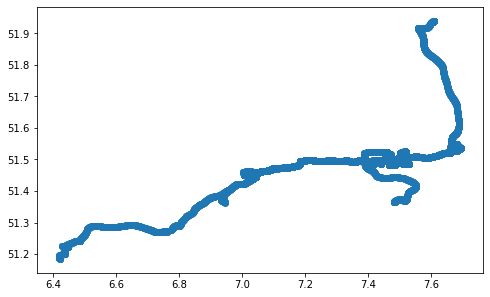

In [4]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

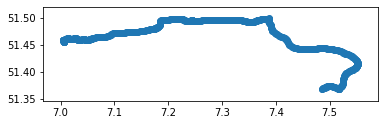

In [6]:
some_track_id = track_df['track.id'].unique()[11] #finding one id checking for 11th track
some_track = track_df[track_df['track.id'] == some_track_id] #finding the track
some_track.plot()

#### Available attributes in the data

In [7]:
track_df.dtypes

id                              object
time                            object
geometry                      geometry
Intake Temperature.value       float64
Intake Temperature.unit         object
Speed.value                    float64
Speed.unit                      object
GPS Accuracy.value             float64
GPS Accuracy.unit               object
O2 Lambda Voltage ER.value     float64
O2 Lambda Voltage ER.unit       object
Engine Load.value              float64
Engine Load.unit                object
O2 Lambda Voltage.value        float64
O2 Lambda Voltage.unit          object
Intake Pressure.value          float64
Intake Pressure.unit            object
MAF.value                      float64
MAF.unit                        object
GPS Altitude.value             float64
GPS Altitude.unit               object
Rpm.value                      float64
Rpm.unit                        object
Throttle Position.value        float64
Throttle Position.unit          object
GPS Speed.value          

#### Length of the track

In [8]:
some_track["track.length"].sum()

31111.37801330711

#### Number of Segments

In [9]:
len(some_track)

558

#### Plotting some attributes (Intake Temperature and Elevation) of the Segments

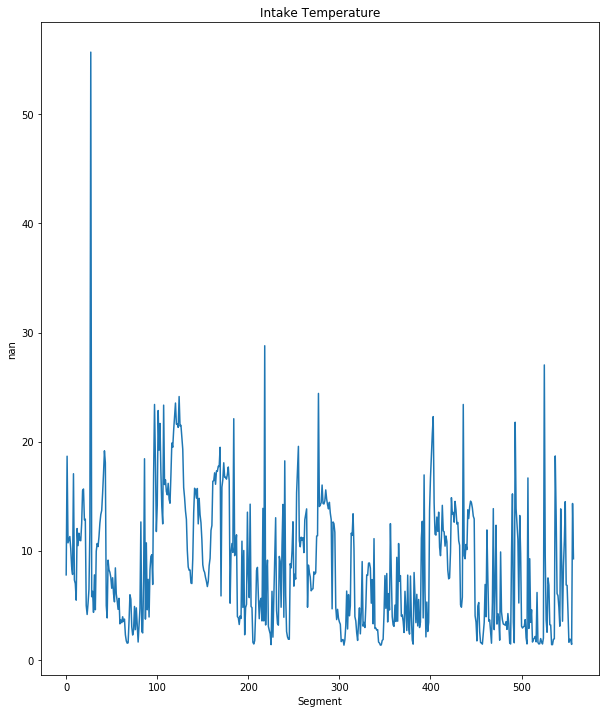

In [10]:
ax = some_track['CO2.value'].plot(figsize= (10,12))
ax.set_title("Intake Temperature")
ax.set_ylabel(some_track['Intake Temperature.unit'][0])
ax.set_xlabel("Segment")
ax

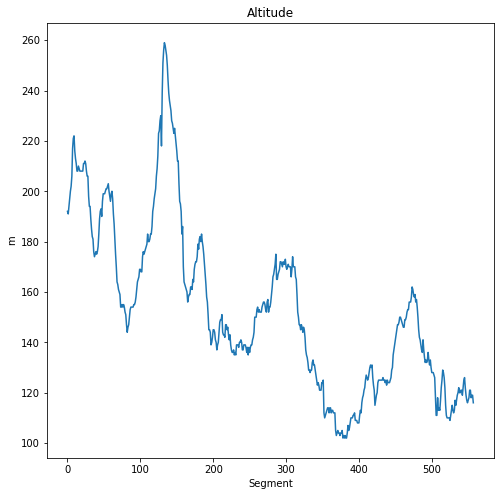

In [11]:
ax = some_track['GPS Altitude.value'].plot(figsize= (8,8) )
ax.set_title("Altitude")
ax.set_ylabel(some_track['GPS Altitude.unit'][0])
ax.set_xlabel("Segment")
ax

#### General Statistics of GPS Altitude 

In [12]:
track_df["GPS Altitude.value"].describe()

count    11538.000000
mean       143.001786
std         25.375782
min         68.000000
25%        125.999998
50%        145.999999
75%        158.835126
max        266.000000
Name: GPS Altitude.value, dtype: float64

## using seaborn for further visualization 

In [13]:
import seaborn as sbn

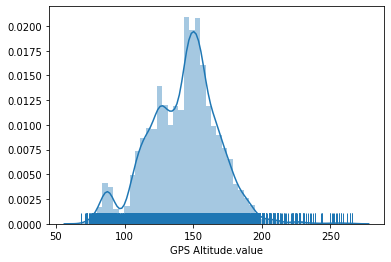

In [14]:
sbn.distplot(track_df["GPS Altitude.value"], hist=True, rug=True)

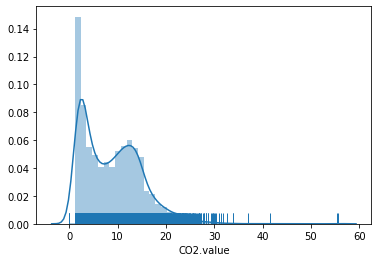

In [15]:
sbn.distplot(track_df["CO2.value"], hist=True, rug=True)

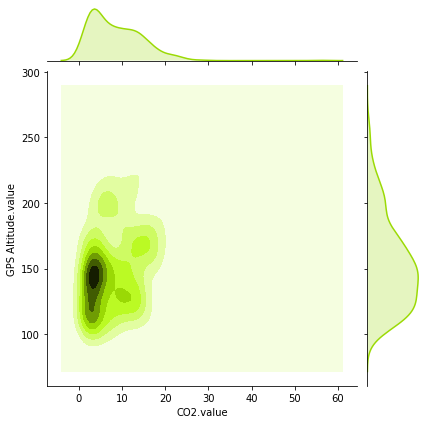

In [16]:
sbn.jointplot(y = "GPS Altitude.value", x = "CO2.value", data=some_track, kind="kde", color = "#9bda05")

#### Altitude and Co2 Emission doesnot look correlated with the visual methods 

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [17]:
import folium

# print(some_track["geometry"]) #= coord 

# print(list(some_track["geometry"].y)) #coord.y

# list(some_track["geometry"].y)

# print(some_track["geometry"].apply(lambda coord: coord.y))

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
# print(lats)
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat - 0.25, avg_lngs], tiles = 'Stamen Terrain', zoom_start=9)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='#e90b64').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [18]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=50,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 255]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location  
view_state = pdk.ViewState(
    longitude=7.286479164659496,
    latitude= 51.46036075627242,
    zoom=9,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state, 
    mapbox_key="pk.eyJ1IjoicG9zaGFuIiwiYSI6InZ5a0dsLVkifQ.DGY81ha1q5VQpj3QA-REew"
)
r.to_html('tracks_muenster.html', iframe_width=900)

'/home/poshan/Desktop/FloatingCar/envirocar-py/examples/tracks_muenster.html'